In [1]:
# import necessary packages
import pandas as pd

In [2]:
all_data=pd.read_csv('data/all_data.csv') # read data from cvs file
all_data.sample(10) # show 10 random samples

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
131798,204843,USB-C Charging Cable,1,11.95,05/11/19 08:36,"920 Highland St, Dallas, TX 75001"
107840,164463,USB-C Charging Cable,2,11.95,03/07/19 21:39,"657 8th St, New York City, NY 10001"
12366,188350,Apple Airpods Headphones,1,150,04/25/19 16:40,"724 10th St, Boston, MA 02215"
18066,193794,Bose SoundSport Headphones,1,99.99,04/25/19 01:19,"122 9th St, Atlanta, GA 30301"
30459,295725,AAA Batteries (4-pack),3,2.99,12/05/19 15:01,"911 River St, San Francisco, CA 94016"
154897,259466,USB-C Charging Cable,1,11.95,10/26/19 10:29,"454 Ridge St, New York City, NY 10001"
92134,210394,Lightning Charging Cable,1,14.95,06/13/19 16:57,"106 12th St, Seattle, WA 98101"
99165,217086,Wired Headphones,1,11.99,06/29/19 10:22,"835 Maple St, Portland, ME 04101"
148409,289574,AA Batteries (4-pack),1,3.84,11/20/19 14:01,"655 Chestnut St, San Francisco, CA 94016"
34844,299895,Bose SoundSport Headphones,1,99.99,12/07/19 14:44,"896 Maple St, Boston, MA 02215"


In [3]:
# get familiar with features using describe and info
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


## First Stage : Clean up the data!

### 1. check for nans

In [5]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
# we will remove nans , their count is small relative to dataset size
all_data.dropna(inplace=True)
# check again
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
all_data[all_data['Order Date']=='Order Date'] # there is issue in data , we need to fix this

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
all_data = all_data[all_data['Order Date'].str[0]!='O'] # remove any row which starts with O from order date column
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
# we need to convert quantity and price into numeric data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
# check 
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


### 2 . rearrange order date feature

`for better analysis , we need to split order date feature into two features , date(day/month/year) and time of purchase`

In [55]:
all_data['Order Date month']=pd.to_datetime(all_data['Order Date'].apply(lambda x:str(x).split(' ')[0])).dt.month
all_data['Order Date time']=pd.to_datetime(all_data['Order Date'].apply(lambda x:str(x).split(' ')[1])).dt.hour

In [57]:
# check rearrangment is done
all_data['Order Date time']

0          8
2         22
3         14
4         14
5          9
          ..
186845    20
186846    16
186847     7
186848    17
186849     0
Name: Order Date time, Length: 185950, dtype: int64

In [58]:
all_data['Order Date month']

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Order Date month, Length: 185950, dtype: int64

### 3. add state column

In [13]:
# we note that for example address : 669 Spruce St, Los Angeles, CA 90001 , but we only insterested in state (Los Angeles)
def extract_city(address):
    '''
    function to extract state from purchase address
    '''
    # convert row to string
    str_address=str(address)
    return str_address.split(',')[1].strip()

all_data['state']=all_data['Purchase Address'].apply(lambda x :extract_city(x))

In [14]:
# check for state column
all_data['state'].sample(10)

57919     San Francisco
70763           Seattle
14402       Los Angeles
88231     New York City
442       San Francisco
97369     New York City
17115            Austin
124229    New York City
105739          Atlanta
135195    New York City
Name: state, dtype: object

### 4. reduce categories

In [15]:
# we note that there is some sort of redundency in products so we may need to reduce products
all_data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [16]:
def reduce_category(product):
    product=str(product)
    if 'Cable' in product:
        return 'Cables'
    elif 'Batteries' in product:
        return 'Batteries'
    elif 'Monitor' in product or 'TV' in product:
        return 'Monitors'
    elif 'Headphones' in product:
        return 'Headphones'
    elif 'Laptop' in product:
        return 'Laptop'
    elif 'Phone' in product:
        return 'Mobile Phone'
    else:
        return 'Washing Machines'

all_data['reduced_categories']=all_data['Product'].apply(lambda x :reduce_category(x))

# check for new categories
all_data['reduced_categories'].value_counts()

Headphones          47756
Cables              43561
Batteries           41218
Monitors            28819
Mobile Phone        14432
Laptop               8852
Washing Machines     1312
Name: reduced_categories, dtype: int64

## Stage 2 : Data Analysis & Exploration

`data analysis and explortion is about asking dataset many questions to reveal its secrets`

### Q1 : what is the relation between every city and products orders

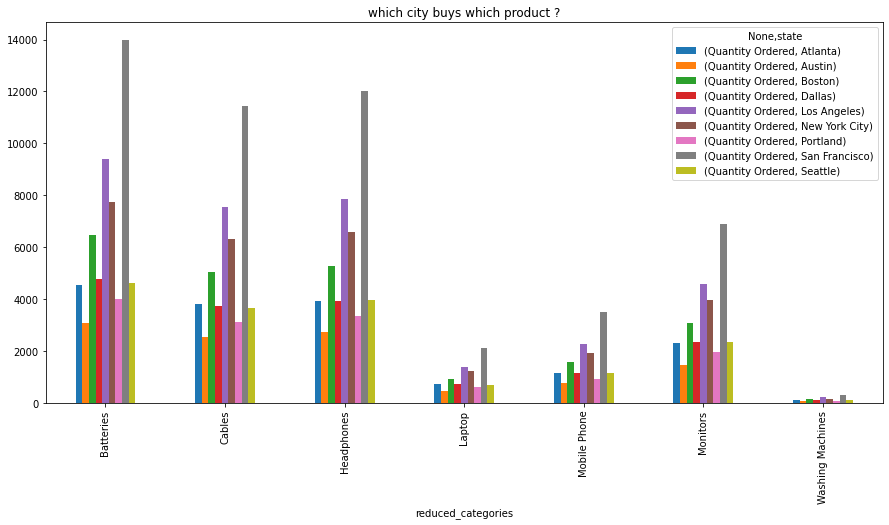

In [32]:
group_city_cat=pd.DataFrame(all_data.groupby(['reduced_categories','state'])['Quantity Ordered'].sum())
group_city_cat.unstack().plot(kind='bar',figsize=(15,7),title='which city buys which product ?')

### Q2: What time should we display advertisements to maximize likelihood of customer's buying product?

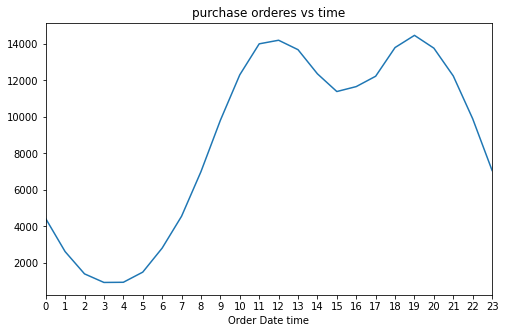

In [46]:
all_data.groupby('Order Date time')['Quantity Ordered'].sum().plot(figsize=(8,5),title='purchase orderes vs time',
                                                                  xticks=range(24))

### Q3: what is seasonality and trend of purchase

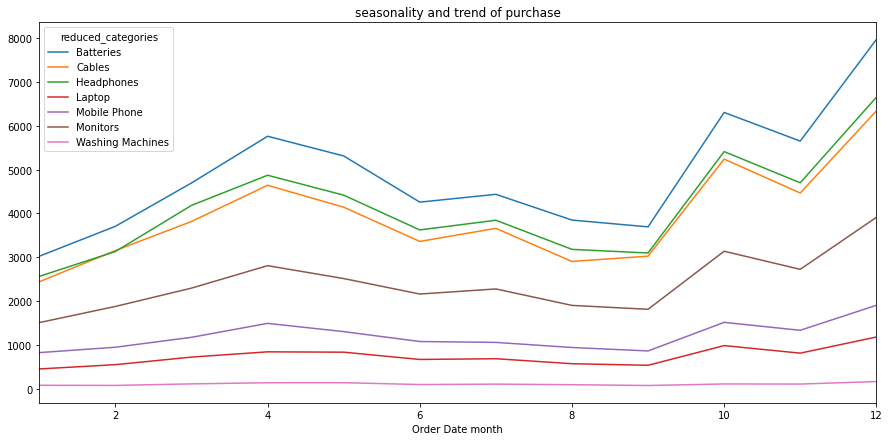

In [65]:
all_data.groupby(['Order Date month','reduced_categories'])['Quantity Ordered'].sum().unstack().plot(figsize=(15,7),
                                                                                                    title='seasonality and trend of purchase')